In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display(img, title="Image", cmap='gray'):
    plt.figure(figsize=(12, 10))     
    plt.imshow(img, cmap=cmap)     
    plt.title(title)     
    plt.axis('off')     
    plt.show()

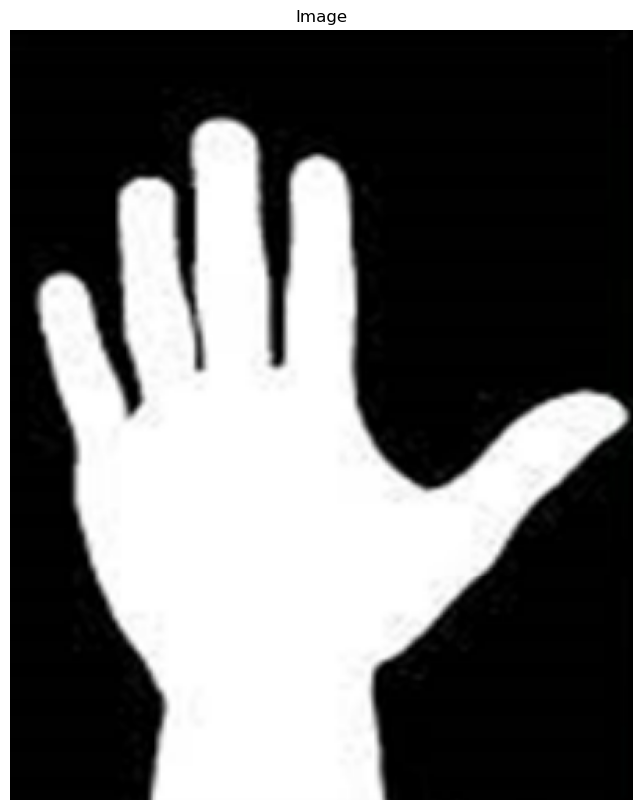

In [3]:
#Görüntüyü yükleme
el = cv2.imread('el.png')
display(el)

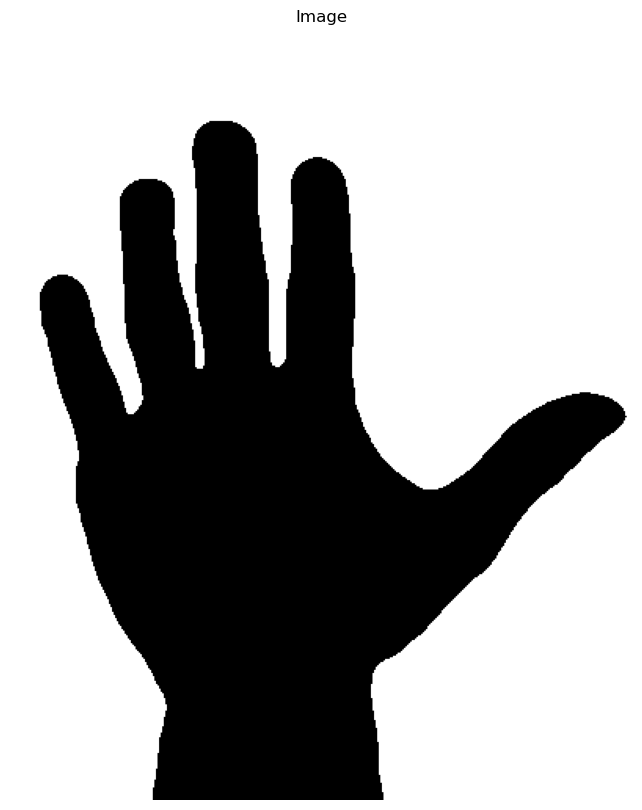

In [4]:
el_blur = cv2.medianBlur(el,7)
gray_el = cv2.cvtColor(el_blur,cv2.COLOR_BGR2GRAY)
ret, th1 = cv2.threshold(gray_el,160,255,cv2.THRESH_BINARY_INV)
display(th1)

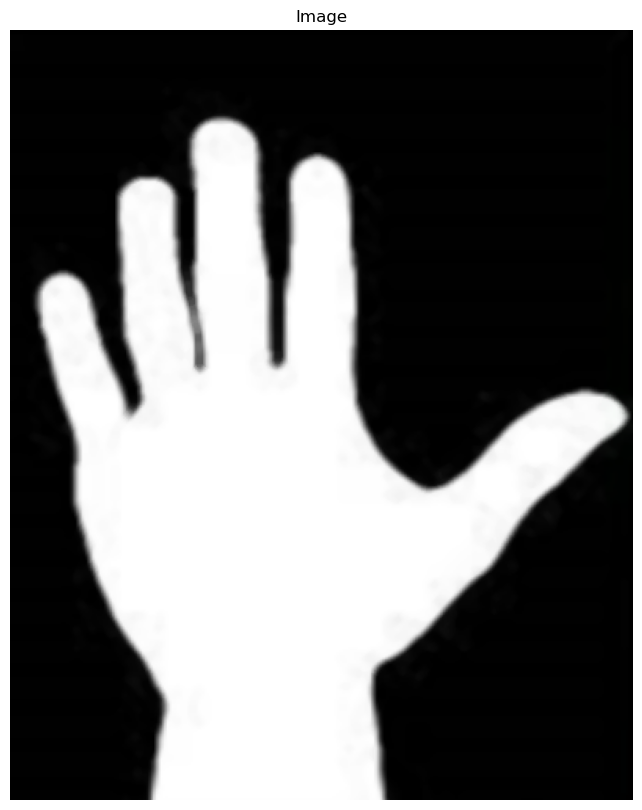

In [5]:
img = cv2.imread('el.png')
img = cv2.medianBlur(img, 7)
display(img)

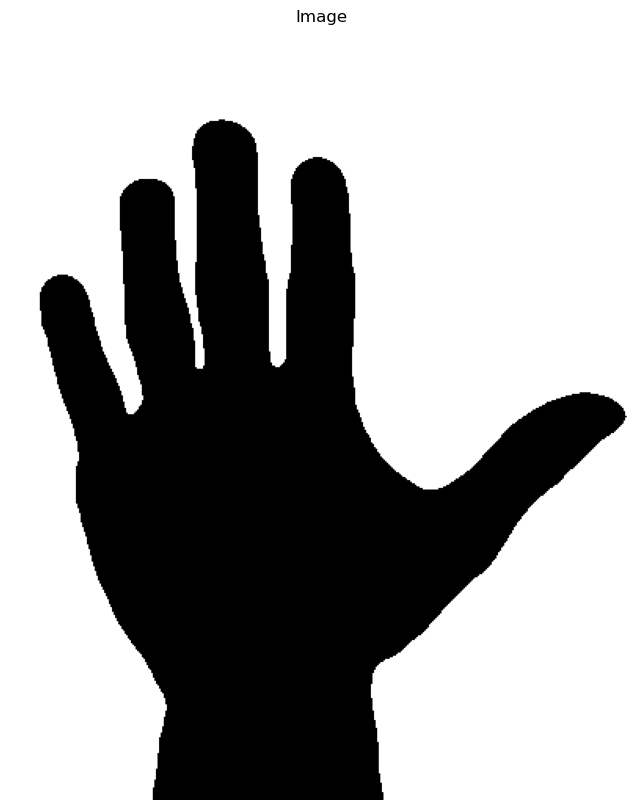

In [6]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,159,255,cv2.THRESH_BINARY_INV)
display(thresh)

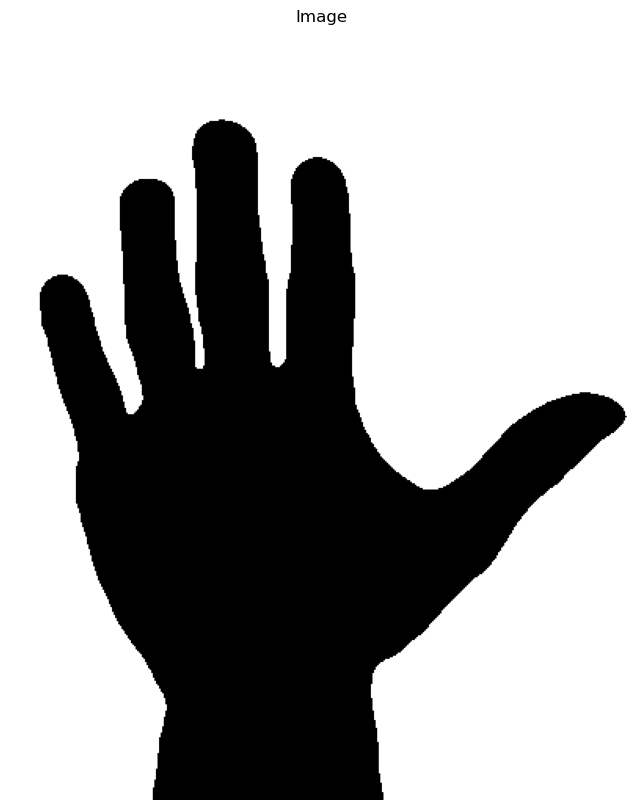

In [7]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=1)
display(opening)

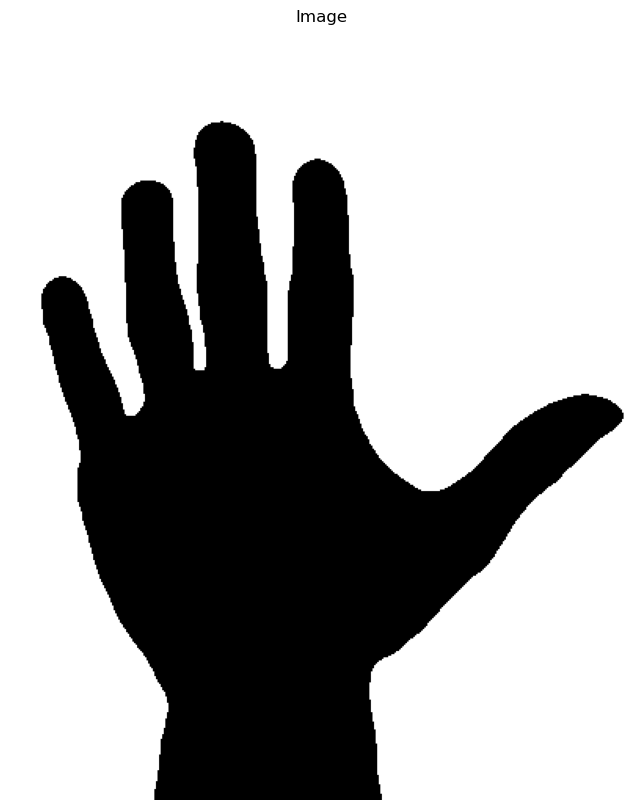

In [8]:
sure_bg = cv2.dilate(opening,kernel,iterations=1)
display(sure_bg)

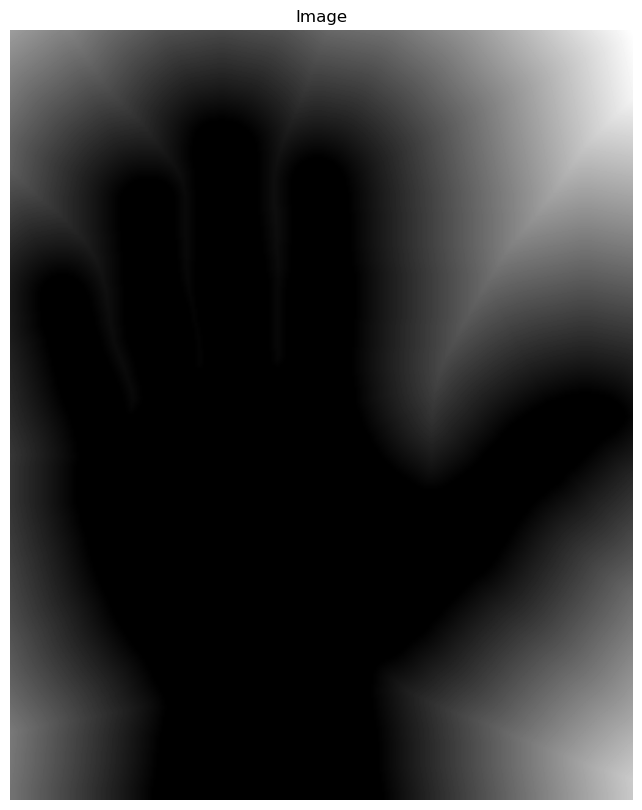

In [9]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,maskSize=5)
display(dist_transform)

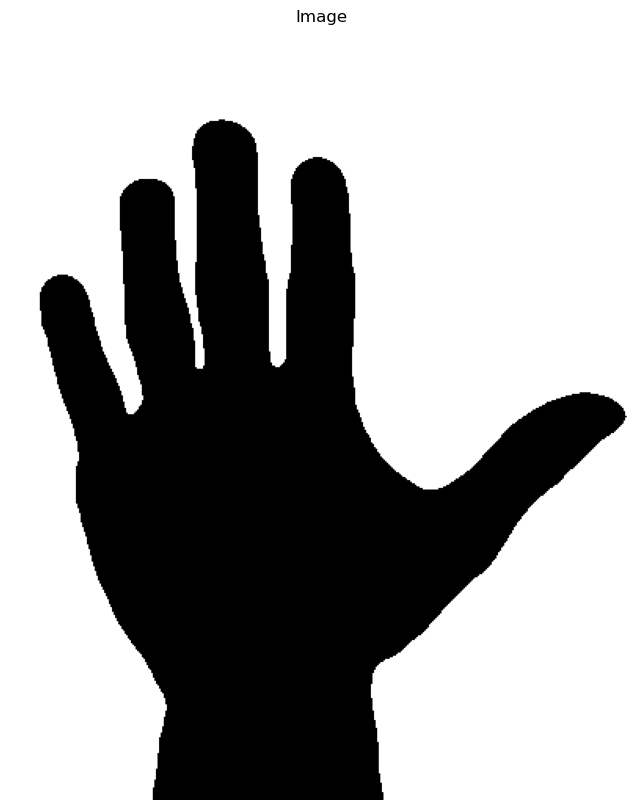

In [10]:
ret,sure_fg = cv2.threshold(dist_transform,0.003*dist_transform.max(),255,0)

display(sure_fg)

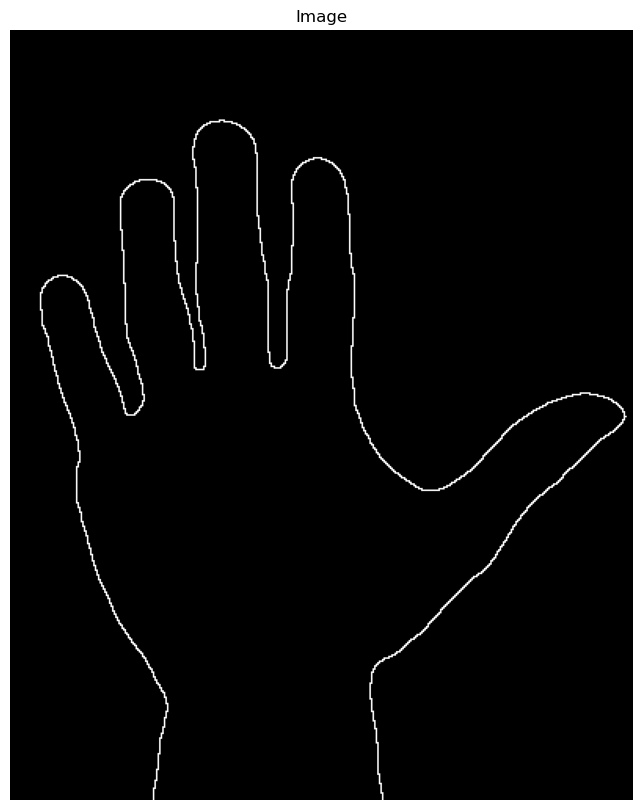

In [11]:
sure_fg = np.uint8(sure_fg)

unknown = cv2.subtract(sure_bg,sure_fg)
display(unknown)

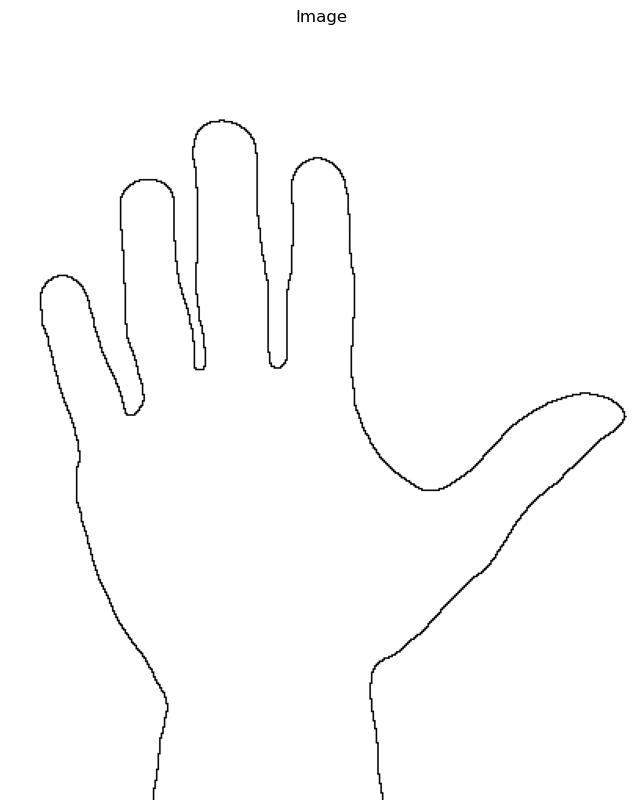

In [12]:
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+255

markers[unknown==255] = 0

display(markers)

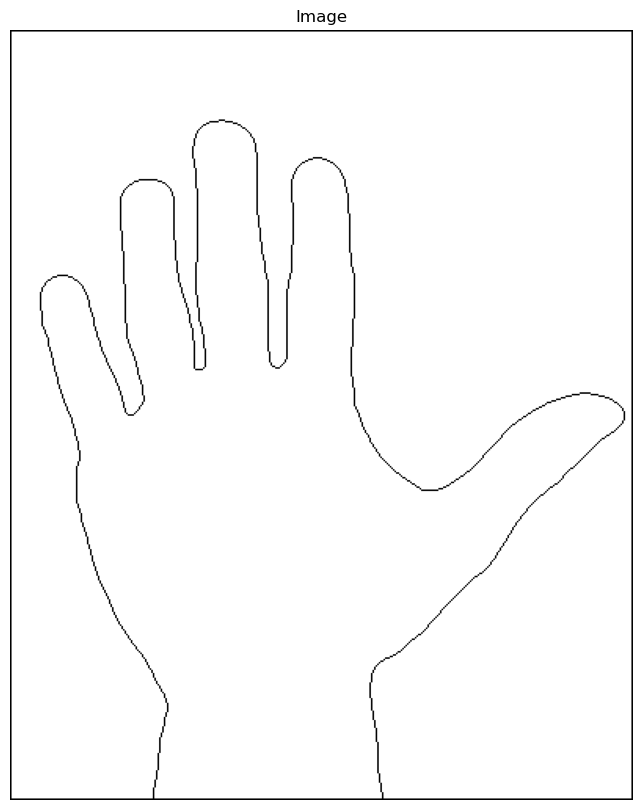

In [13]:
markers =cv2.watershed(img,markers)
display(markers)

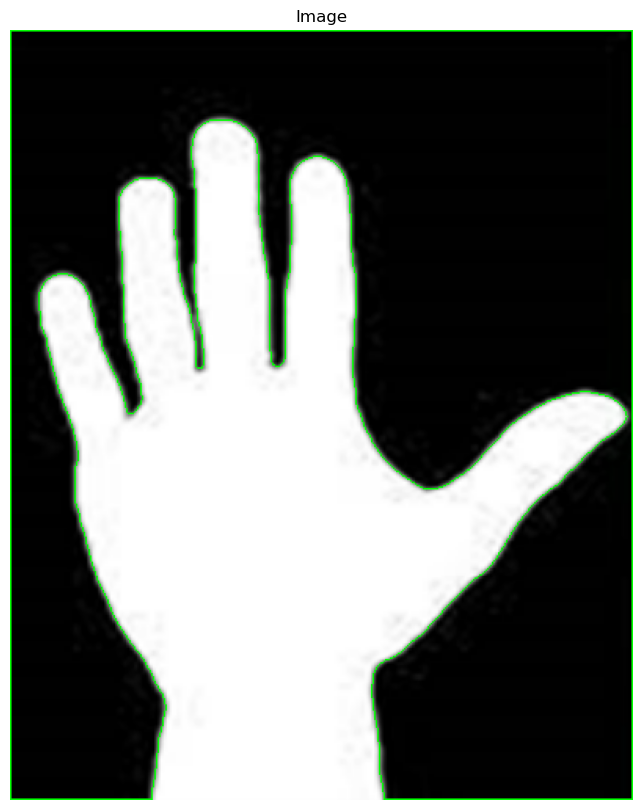

In [14]:
# Kontur bulma işlemi (RETR_CCOMP kullanarak)
contours, hierarchy = cv2.findContours(th1.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# Konturları kontrol edip çizme işlemi
for contour, h in zip(contours, hierarchy[0]):
    if h[3] == -1:  # Yalnızca en dış konturları seç
        cv2.drawContours(el, [contour], -1, (0, 255, 0), 1)
        
display(el)

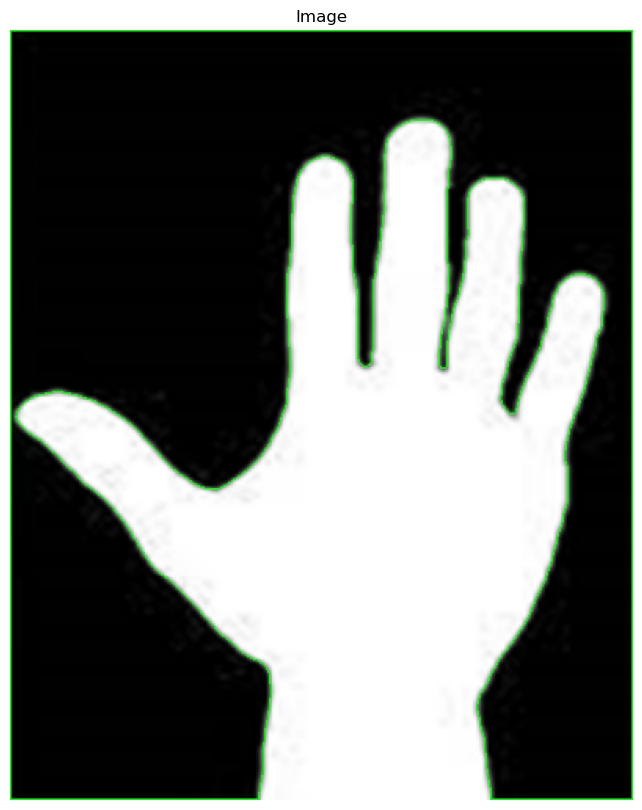

In [15]:
image = cv2.flip(el, 1)
el = image
display(el)